In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
# import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.21.1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn import datasets

In [3]:
housing = datasets.fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=21)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=34)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_wide, input_deep], 
                           outputs=[output, output2])
 

model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [7]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], 
                    [y_train, y_train], 
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]), 
                    epochs=100, 
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 58us/sample - loss: 4.1088 - dense_2_loss: 1.8473 - dense_3_loss: 2.2615 - val_loss: 2.2155 - val_dense_2_loss: 0.8814 - val_dense_3_loss: 1.3341
Epoch 2/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.9976 - dense_2_loss: 0.7833 - dense_3_loss: 1.2143 - val_loss: 1.8591 - val_dense_2_loss: 0.7209 - val_dense_3_loss: 1.1382
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.7288 - dense_2_loss: 0.6802 - dense_3_loss: 1.0486 - val_loss: 1.6598 - val_dense_2_loss: 0.6561 - val_dense_3_loss: 1.0036
Epoch 4/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.5603 - dense_2_loss: 0.6260 - dense_3_loss: 0.9342 - val_loss: 1.5129 - val_dense_2_loss: 0.6115 - val_dense_3_loss: 0.9014
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.4400 - dense_2_loss: 0.5871 - dense

11610/11610 [==============================] - 0s 31us/sample - loss: 0.9699 - dense_2_loss: 0.4135 - dense_3_loss: 0.5564 - val_loss: 0.9821 - val_dense_2_loss: 0.4203 - val_dense_3_loss: 0.5618
Epoch 41/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.9642 - dense_2_loss: 0.4118 - dense_3_loss: 0.5524 - val_loss: 0.9773 - val_dense_2_loss: 0.4190 - val_dense_3_loss: 0.5583
Epoch 42/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.9597 - dense_2_loss: 0.4106 - dense_3_loss: 0.5491 - val_loss: 0.9684 - val_dense_2_loss: 0.4159 - val_dense_3_loss: 0.5525
Epoch 43/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.9543 - dense_2_loss: 0.4088 - dense_3_loss: 0.5454 - val_loss: 0.9662 - val_dense_2_loss: 0.4158 - val_dense_3_loss: 0.5504
Epoch 44/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.9490 - dense_2_loss: 0.4072 - dense_3_loss: 0.5418 - val_loss: 0.9629 - val_dense_2_loss: 0.

11610/11610 [==============================] - 0s 31us/sample - loss: 0.8007 - dense_2_loss: 0.3610 - dense_3_loss: 0.4396 - val_loss: 0.8155 - val_dense_2_loss: 0.3643 - val_dense_3_loss: 0.4512
Epoch 80/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.7981 - dense_2_loss: 0.3602 - dense_3_loss: 0.4379 - val_loss: 0.8184 - val_dense_2_loss: 0.3654 - val_dense_3_loss: 0.4531


In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 4)
    plt.show()

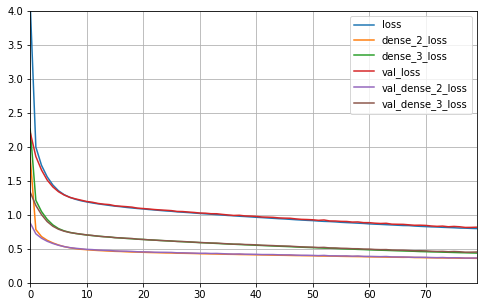

In [14]:
plot_learning_curves(history)

In [10]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

5160/5160 [==============================] - 0s 16us/sample - loss: 0.8221 - dense_2_loss: 0.3721 - dense_3_loss: 0.4500


[0.8220510090968406, 0.3720896, 0.44996145]